In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [2]:
# import the preliminary cleaned data in last section
data = pd.read_csv('./data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295896 entries, 0 to 1295895
Data columns (total 72 columns):
loan_amnt                     1295864 non-null float64
funded_amnt                   1295864 non-null float64
funded_amnt_inv               1295864 non-null float64
term                          1295864 non-null object
int_rate                      1295864 non-null object
installment                   1295864 non-null float64
grade                         1295864 non-null object
sub_grade                     1295864 non-null object
emp_title                     1208774 non-null object
emp_length                    1212582 non-null object
home_ownership                1295864 non-null object
annual_inc                    1295864 non-null float64
verification_status           1295864 non-null object
purpose                       1295864 non-null object
title                         1276095 non-null object
zip_code                      1295863 non-null object
addr_state        

## Split into train and test datasets

In [3]:
count_year=data['year'].value_counts()
print(count_year)

2015    383794
2016    347678
2014    228978
2017    215424
2018    108659
2019     11363
Name: year, dtype: int64


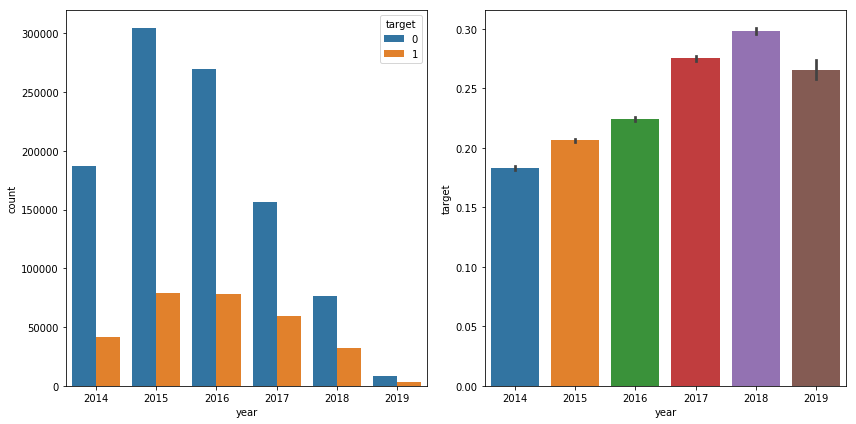

In [4]:
# To see the percentage of bad loan for each year is independent or not?
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.countplot(x='year', hue='target', data=data, ax=ax[0])
sns.barplot(x='year', y='target', data=data, ax=ax[1])
plt.tight_layout()
plt.show()

The percentage of default loan for each year is found to be at relative close range. 
Therefore, we choose Year 2014 - 2017, as the training data, and Year 2018-2019 as the test data.

In [5]:
train = data.loc[data['year'] .isin(['2014','2015','2016','2017'])]
test = data.loc[data['year'] .isin(['2018','2019'])]
print('Train data shape:',train.shape)
print('Test data shape:',test.shape)

Train data shape: (1175874, 72)
Test data shape: (120022, 72)


In [6]:
train['target'].value_counts()

0    917612
1    258262
Name: target, dtype: int64

In [7]:
test['target'].value_counts()

0    84607
1    35415
Name: target, dtype: int64

## Feature engineering

### Missing data imputation

In [8]:
# missing value proportions 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(6)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information greater than 20%
        return mis_val_table_ren_columns
    
missing_values_table(train)

Your selected dataframe has 72 columns.
There are 70 columns that have missing values.


,Missing Values,% of Total Values
mths_since_recent_inq,114776,9.760910
emp_title,74217,6.311646
emp_length,72553,6.170134
num_tl_120dpd_2m,53751,4.571153
mo_sin_old_il_acct,33544,2.852687
title,19789,1.682918
bc_util,13404,1.139918
percent_bc_gt_75,13127,1.116361
bc_open_to_buy,12711,1.080983
mths_since_recent_bc,11991,1.019752


In [9]:
missing_values_table(test)

Your selected dataframe has 72 columns.
There are 70 columns that have missing values.


,Missing Values,% of Total Values
emp_title,12905,10.752195
emp_length,10761,8.965856
mths_since_recent_inq,10403,8.667578
mo_sin_old_il_acct,4140,3.449368
num_tl_120dpd_2m,3495,2.911966
bc_util,2077,1.730516
percent_bc_gt_75,1997,1.663862
bc_open_to_buy,1994,1.661362
mths_since_recent_bc,1859,1.548883
dti,333,0.277449


In [10]:
# There're 20 samples in train and 12 samples in test that all features are Null 
pd.set_option('display.max_columns', None)
train[train['loan_amnt'] .isnull()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,year,target
228976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,1
228977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,1
612770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1
612771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1
733491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,1
733492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,1
821887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,1
821888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,1
893845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,1
893846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,1


In [11]:
# Locate these rows
Index1 = train[np.isnan(train['loan_amnt'])].index
Index2 = test[np.isnan(test['loan_amnt'])].index
# Delete them
train.drop(Index1,inplace=True)
test.drop(Index2,inplace=True)

In [12]:
missing_values_table(train)

Your selected dataframe has 72 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
mths_since_recent_inq,114756,9.759375
emp_title,74197,6.310052
emp_length,72533,6.168538
num_tl_120dpd_2m,53731,4.569530
mo_sin_old_il_acct,33524,2.851034
title,19769,1.681246
bc_util,13384,1.138237
percent_bc_gt_75,13107,1.114679
bc_open_to_buy,12691,1.079301
mths_since_recent_bc,11971,1.018069


In [13]:
missing_values_table(test)

Your selected dataframe has 72 columns.
There are 13 columns that have missing values.


,Missing Values,% of Total Values
emp_title,12893,10.743271
emp_length,10749,8.956754
mths_since_recent_inq,10391,8.658445
mo_sin_old_il_acct,4128,3.439713
num_tl_120dpd_2m,3483,2.902258
bc_util,2065,1.720690
percent_bc_gt_75,1985,1.654029
bc_open_to_buy,1982,1.651529
mths_since_recent_bc,1847,1.539038
dti,321,0.267478


Analyze from bottom to top:<br>
For **zip_code**, theoretically, we can try to add latitude, longitude, local population and local economic data to make it more informative. However, as I am not quite familiar with US postal code distribution, I will delete this feature anyway.

In [14]:
train = train.drop(labels='zip_code', axis=1)
test = test.drop(labels='zip_code', axis=1)

For **inq_last_6mths**(The number of inquiries in past 6 months (excluding auto and mortgage inquiries).):
Since there's only one missing value, and it varies from 0 to 6. Use the mode (most frequent value) to replace it.

In [15]:
train['inq_last_6mths'].value_counts()

0.0    693809
1.0    316570
2.0    110438
3.0     38401
4.0     11894
5.0      4199
6.0       542
Name: inq_last_6mths, dtype: int64

In [16]:
train['inq_last_6mths'] = train['inq_last_6mths'].fillna(value=0.0)
test['pct_tl_nvr_dlq'] = test['pct_tl_nvr_dlq'].fillna(value=100.0)

For **num_rev_accts**(Number of revolving accounts):<br>
It's a continuous feature, so it is reasonable to fill with a median value

In [17]:
num_rev_accts_median = train['num_rev_accts'].median()
train['num_rev_accts'] = train['num_rev_accts'].fillna(value=num_rev_accts_median)
#train['num_rev_accts'] = train['num_rev_accts'].fillna(value=train['num_rev_accts'].median)

For **avg_cur_bal**(Average current balance of all accounts): use median value to fill in

In [18]:
avg_cur_bal_median = train['avg_cur_bal'].median()
train['avg_cur_bal'] = train['avg_cur_bal'].fillna(value=avg_cur_bal_median)
test['avg_cur_bal'] = test['avg_cur_bal'].fillna(value=avg_cur_bal_median)
#train['avg_cur_bal'] = train['avg_cur_bal'].fillna(value=train['avg_cur_bal'].median)

For **dti**(A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income):
 

In [19]:
# fill the missing value with the median value
dti_median = train['dti'].median()
train['dti'] = train['dti'].fillna(value=dti_median)
test['dti'] = test['dti'].fillna(value=dti_median)

For **revol_util**(Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.):<br>
The data type of this feature is object, and it is a percentage variable. Need to transfer to float, and parse the data to delete the '%'


In [20]:
train['revol_util'] = train['revol_util'].str.strip("%").astype(float)/100
test['revol_util'] = test['revol_util'].str.strip("%").astype(float)/100
revol_util_median = train['revol_util'].median()
train['revol_util'] = train['revol_util'].fillna(value=revol_util_median)
test['revol_util'] = test['revol_util'].fillna(value=revol_util_median)

For **mths_since_recent_bc**(Months since most recent bankcard account opened.) <br>**mths_since_recent_inq**(Months since most recent inquire.)
    

In [21]:
mths_recent_bc_median = train['mths_since_recent_bc'].median()
mths_recent_inq_median = train['mths_since_recent_inq'].median()
train['mths_since_recent_bc'] = train['mths_since_recent_bc'].fillna(value = mths_recent_bc_median)
train['mths_since_recent_inq'] = train['mths_since_recent_inq'].fillna(value = mths_recent_inq_median)
test['mths_since_recent_bc'] = test['mths_since_recent_bc'].fillna(value = mths_recent_bc_median)
test['mths_since_recent_inq'] = test['mths_since_recent_inq'].fillna(value = mths_recent_inq_median)

For **num_tl_120dpd_2m** (Number of accounts currently 120 days past due (updated in past 2 months)), use most frequent value 0 to fill in the missing values

In [22]:
train['num_tl_120dpd_2m'] = train['num_tl_120dpd_2m'].fillna(value=0)
test['num_tl_120dpd_2m'] = test['num_tl_120dpd_2m'].fillna(value=0)

For **bc_open_to_buy** (Total open to buy on revolving bankcards),<br> **bc_util** (Ratio of total current balance to high credit/credit limit for all bankcard accounts.), <br> **percent_bc_gt_75** (Percentage of all bankcard accounts > 75% of limit), <br> **mo_sin_old_il_acct**(Months since oldest bank installment account opened.), <br>  use the fill in with median value strategy :

In [23]:
bc_open_to_buy_median = train['bc_open_to_buy'].median()
train['bc_open_to_buy'] = train['bc_open_to_buy'].fillna(value=bc_open_to_buy_median)
test['bc_open_to_buy'] = test['bc_open_to_buy'].fillna(value=bc_open_to_buy_median)

In [24]:
bc_util_median = train['bc_util'].median()
train['bc_util'] = train['bc_util'].fillna(value=bc_util_median)
test['bc_util'] = test['bc_util'].fillna(value=bc_util_median)

In [25]:
percent_bc_gt_75_median = train['percent_bc_gt_75'].median()
train['percent_bc_gt_75'] = train['percent_bc_gt_75'].fillna(value=percent_bc_gt_75_median)
test['percent_bc_gt_75'] = test['percent_bc_gt_75'].fillna(value=percent_bc_gt_75_median)

In [26]:
mo_sin_old_il_acct_median = train['mo_sin_old_il_acct'].median()
train['mo_sin_old_il_acct'] = train['mo_sin_old_il_acct'].fillna(value=mo_sin_old_il_acct_median)
test['mo_sin_old_il_acct'] = test['mo_sin_old_il_acct'].fillna(value=mo_sin_old_il_acct_median)

In [27]:
# emp_title contains too many categories, it is better to delete it
train = train.drop(labels='emp_title', axis=1)
test = test.drop(labels='emp_title', axis=1)

In [28]:
# for 'title', we will fill the missing value with another category, named as "missing"
train['title'] = train['title'].fillna(value='Missing')

For **employ_length**, usually it is a positive relationship with annual income based on common sense. Though it is not absolute, but let's explore to see the correlation of these two variables below.

In [33]:
def str_parser(x):
    """ function to parse `int_rate` and `revol_util` """
    if '< 1' in str(x):
        return str(x).replace('< 1', '0')
    elif '+' in str(x):
        return str(x).replace('+', '')
    if 'years' in str(x):
        return str(x).replace('years', 'year')
    return x

In [34]:
train['emp_length'] = train['emp_length'].apply(str_parser)
test['emp_length'] = test['emp_length'].apply(str_parser)

In [35]:
train['emp_length'] = train['emp_length'].str.strip("year").astype(float)
test['emp_length'] = test['emp_length'].str.strip("year").astype(float)

In [36]:
# check their correlation first
employ_length_salary = pd.DataFrame({'x':train['emp_length'], 'y':train['annual_inc']})
employ_length_salary.corr()

,x,y
x,1.00000,0.03832
y,0.03832,1.00000


As shown, surprisingly, we find that these two columns have few relationship. Choose mode method to fill in the missing value might be better here. 

In [37]:
emp_length_mode = train['emp_length'].mode()[0]
train['emp_length'] = train['emp_length'].fillna(value=emp_length_mode)
test['emp_length'] = test['emp_length'].fillna(value=emp_length_mode)

In [38]:
missing_values_table(train)

Your selected dataframe has 70 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [39]:
missing_values_table(test)

Your selected dataframe has 70 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [40]:
# save to disk
train.to_csv('./train_clean.csv', index=False)
test.to_csv('./test_clean.csv', index=False)